# ELE 435-535 Computational Lab 2

### Due Date: 09/30/2019 (Monday) 11:59 PM
### Name: Minh-Thi Nguyen

### Import required Python packages

In [351]:
# Import additional packages if needed
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as io
from numpy.polynomial.polynomial import polyfit
import matplotlib.pyplot as plt

%matplotlib inline

### YALE B Dataset

You will use the YALE B face dataset to explore face recognition by classifying face images. The Yale B dataset contains frontal face images (size 192 x 168) of 38 subjects, with around 64 images per subject (not all subjects have the same number of images). The total number of images is 2,414. The images have been column-wise vectorized into 192 x 168 = 32,256 column vectors and these are stored as the columns of a matrix X. The corresponding 2,414 labels, ranging rom 1 to 39 (no 14), are provided in a row vector Y. For background and additional reading, refer to http://research.microsoft.com/pubs/132810/PAMI-Face.pdf.

### Display Some Images

In [352]:
# This cell is given. You do not need to modify.

# Functions to represent the image in matrix or column vector
def packcw(A):
    return (A.T).reshape(-1,1)

def unpackcw(x,nr):
    return x.reshape(-1,nr).T

1) Load the YALEBXF.mat face data and display the first image of 38 subjects on a 5 x 8 tile. (This part is done as an example) 

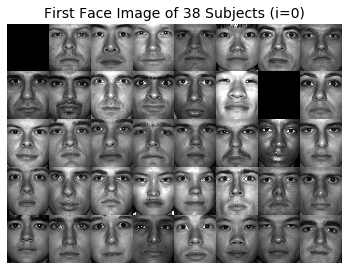

In [465]:
# This cell is given. You do not need to modify.
# You can reference this code for other questions below but just mention where you got it from.

# Load the YALE B database
YALE = io.loadmat('YALEBXF(2).mat') 
X = YALE['X']
Y = YALE['Y']
nr, nc = 192, 168 # height = 192, width = 168
dim = nr * nc     # dimension = 32256
nex = X.shape[1]  # Total number of examples = 2414

nFc = 40          # Total number of faces
nImg = np.zeros(nFc) # Numper of examples for each person
for i in range(nFc):
    nImg[i] = (Y==i).sum()
    
# Show the faces
# Make face board of 38 faces
faceIdx = 0 # index of face to display for each subject
Bh, Bw = 5, 8
FB = np.zeros((Bh*nr, Bw*nc))
for i in range(nFc):
    if nImg[i]>0:
        loc = np.where(Y==i)[1]
        x = X[:,loc[faceIdx]]
        A = unpackcw(x,nr)
        row, col = divmod(i,Bw)
        rpt, cpt = row*nr, col*nc
        FB[rpt:rpt+nr, cpt:cpt+nc] = A
plt.figure(figsize = (6,6))
plt.imshow(FB, cmap='gray')
plt.axis('off')
plt.title("First Face Image of 38 Subjects (i=%i)" %faceIdx, fontsize=14)
plt.show()

In [387]:
X.shape

(32256, 2414)

2) Before processing the data, split them into training and test sets. Use the first 50 images of each subject as the training data and the rest as the test data. Please note that the total number of images for each subject is different.

In [360]:
# first 50 images as training data  i = 0-49
# rest as test data
# nFc = 40 = Total number of faces
# nImg = np.zeros(nFc) # Numper of examples for each person
#for i in range(nFc):
    #nImg[i] = (Y==i).sum()
# nex = X.shape[1]  # Total number of examples = 2414

# the training set has dimensions 32256x1900
# the test set has dimensions 32256x514
train_set = np.zeros((32256,1900))
test_set = np.zeros((32256,514))


#loop through the X matrix for each test subject index
# 38 subjects (label 1 - 39)

#index of test data
ind_test = 0

index_loop = np.arange(0, 39, 1)
index_loop = np.delete(index_loop, 13)

for i in index_loop:
    search_value = i+1 #look for object
    index_vector = np.where(Y==search_value)[1] # find indices of location of object
    examples_number = len(index_vector) #number of samples for each object
    
    for j in range(examples_number-1):
        if j < 50:
            index_train = index_vector[j]
            if i > 13:
                train_set[:,(i-1)*50+j] = X[:,index_train]
            else:
                train_set[:,i*50+j] = X[:,index_train]
        else:
            index_test = index_vector[j]
            test_set[:,ind_test+(j-50)] = X[:,index_test]
            ind_test = ind_test + 1
    
print(train_set.shape)
print(test_set.shape)

(32256, 1900)
(32256, 514)


3) Compute the mean of all the training faces. Then center the entire dataset using this mean. 

In [361]:
#compute the mean of all the training faces 
#compute the mean of all columns (each row) in training dataset 
mean_train = np.zeros((32256,1))
for i in range(32256):
    mean_value = np.mean(train_set[i,:])
    mean_train[i] = mean_value

In [362]:
# create a matrix of the mean vector to get full subtraction of two matrices
mean_matrix = np.zeros((32256,1900))

for i in range(1900):
    mean_matrix[:,i] = mean_train[:,0]

In [363]:
#center the dataset using mean by subtracting from all vectors
centered_train = train_set - mean_matrix

centered_train.shape

(32256, 1900)

### Singular Value Decomposition

4) Compute SVD on the centered training data (You can use the svd function).

Note: Since the data set is large, it might take some time so do it once then save each variable so you can simply load the results again when needed.

In [364]:
# construct reduced SVD

u, s, vh = np.linalg.svd(centered_train, full_matrices=False)


5) Plot the top 200 variances (squares of the singular values) in order from largest to smallest and the cumulative sum of those variances. Use the functions A.sum() and A.cumsum() Where does the difference in variances start to become less significant? Mark the point as a vertical dashed line. At what index do you capture 95% of the total variance? Mark that as a second vertical line.

In [365]:
# acquire the top 200 variances 
# square the singular values 
# s = vectors of singular values ordered in descending order 
var = s**2
var_new = var[0:200]
len(var_new)

200

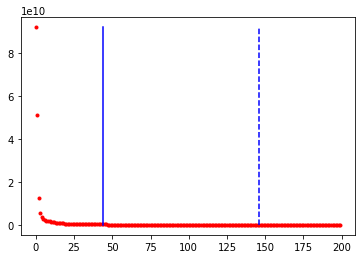

In [439]:
# plot variances

# evenly sampled time at 200ms intervals
ind = np.arange(0, 200, 1)

plt.plot(ind, var_new, 'r.')
plt.plot((146,146),(np.amin(var_new),np.amax(var_new)),'b--')
plt.plot((44,44),(np.amin(var_new),np.amax(var_new)),'b-')
plt.show()

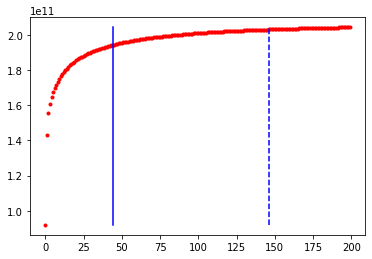

In [438]:
# plot cumulative sum
cum_var = np.cumsum(var_new)

plt.plot(ind, cum_var, 'r.')
plt.plot((146,146),(np.amin(cum_var),np.amax(cum_var)),'b--')
plt.plot((44,44),(np.amin(cum_var),np.amax(cum_var)),'b-')
plt.show()

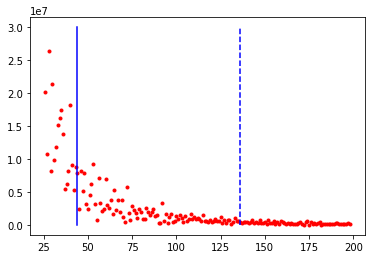

[4.06632661e+10 3.89174023e+10 6.95628809e+09 1.55605110e+09
 1.08851687e+09 3.98351707e+08 4.06461151e+08 1.75728942e+08
 7.06593572e+07 2.12299499e+08 2.09888517e+08 8.81651076e+07
 8.17196676e+07 1.21789065e+08 2.04484820e+07 8.62438144e+07
 7.54183196e+07 3.29855499e+07 8.02924025e+07 2.30656237e+07
 3.90763714e+07 6.26445849e+07 2.19724428e+07 2.25982955e+07
 1.91670720e+07 1.71260338e+07 2.01219114e+07 1.08078379e+07
 2.63931753e+07 8.23054200e+06 2.13465921e+07 9.80963147e+06
 1.17509337e+07 1.51364447e+07 1.62183636e+07 1.74199830e+07
 1.38211824e+07 5.41026888e+06 6.26314557e+06 8.12538203e+06
 1.82445938e+07 9.14226580e+06 5.29780847e+06 8.80417252e+06
 7.86154545e+06 2.44793733e+06 8.20594504e+06 5.22086200e+06
 7.85499381e+06 3.18623782e+06 2.47953609e+06 4.55320825e+06
 6.20048212e+06 9.23968976e+06 3.22379707e+06 6.99007088e+05
 7.05786053e+06 3.26163347e+06 2.11994485e+06 2.44081740e+06
 7.03341962e+06 3.04661754e+06 2.63017849e+06 3.73769635e+06
 1.66625311e+06 5.313815

In [437]:
# find where differences become less significant

#create a new vector with differences between values oof variance 
differences = np.zeros(199)
for i in range(199):
    differences[i] = np.absolute(var_new[i+1] - var_new[i])
    
indnew = np.arange(0, 199, 1)
plt.plot(indnew[26:], differences[26:], 'r.')
plt.plot((136,136),(800,3e7),'b--')
plt.plot((44,44),(800,3e7),'b-')
plt.show()

print(differences)
print("We see that from the plot, by eye, differences become less significant around after 146")


In [369]:
#find index where you capture 95% of the variance 

#find the total value of the variance
sum_variance = np.sum(var_new)
desired_value = 0.95*sum_variance

large_indices = [i for i,sum_value in enumerate(cum_var >= desired_value) if sum_value]

#print index where you capture 95%
print(large_indices[0])

44


6) Compute the projection of data onto the first $d$ principal components for $d = 8,16,32,64,128,256$.

In [496]:
# reduce the dimensionality of the data to d = 8
d_value = 8

#select the first d columns of U
u_new = np.zeros((32256,d_value))
v_new = np.zeros((d_value,1900))
                                
for j in range(d_value):
    u_new[:,j] = u[:,j]
    u_new[:,j] = u_new[:,j]*s[j] # principal components
    v_new[j,:] = vh[j,:]
    
reduced_matrix_8 = np.dot(u_new,v_new)

In [497]:
# reduce the dimensionality of the data to d = 16
d_value = 16

#select the first d columns of U
u_new = np.zeros((32256,d_value))
v_new = np.zeros((d_value,1900))
                                
for j in range(d_value):
    u_new[:,j] = u[:,j]
    u_new[:,j] = u_new[:,j]*s[j] # principal components
    v_new[j,:] = vh[j,:]
    
reduced_matrix_16 = np.dot(u_new,v_new)

In [498]:
# reduce the dimensionality of the data to d = 32
d_value = 32

#select the first d columns of U
u_new = np.zeros((32256,d_value))
v_new = np.zeros((d_value,1900))
                                
for j in range(d_value):
    u_new[:,j] = u[:,j]
    u_new[:,j] = u_new[:,j]*s[j] # principal components
    v_new[j,:] = vh[j,:]
    
reduced_matrix_32 = np.dot(u_new,v_new)

In [499]:
# reduce the dimensionality of the data to d = 64
d_value = 64

#select the first d columns of U
u_new = np.zeros((32256,d_value))
v_new = np.zeros((d_value,1900))
                                
for j in range(d_value):
    u_new[:,j] = u[:,j]
    u_new[:,j] = u_new[:,j]*s[j] # principal components
    v_new[j,:] = vh[j,:]
    
reduced_matrix_64 = np.dot(u_new,v_new)

In [500]:
# reduce the dimensionality of the data to d = 128
d_value = 128

#select the first d columns of U
u_new = np.zeros((32256,d_value))
v_new = np.zeros((d_value,1900))
                                
for j in range(d_value):
    u_new[:,j] = u[:,j]
    u_new[:,j] = u_new[:,j]*s[j] # principal components
    v_new[j,:] = vh[j,:]
    
reduced_matrix_128 = np.dot(u_new,v_new)

In [501]:
# reduce the dimensionality of the data to d = 256
d_value = 256

#select the first d columns of U
u_new = np.zeros((32256,d_value))
v_new = np.zeros((d_value,1900))
                                
for j in range(d_value):
    u_new[:,j] = u[:,j]
    u_new[:,j] = u_new[:,j]*s[j] # principal components
    v_new[j,:] = vh[j,:]
    
reduced_matrix_256 = np.dot(u_new,v_new)

7) Approximate the original image from the projected data onto first $d$ principal components for $d = 8,16,32,64,128,256$. Then, display the approximate faces for the same images from 1) in a 5 x 8 tile. Remember to add back the mean before displaying the image.

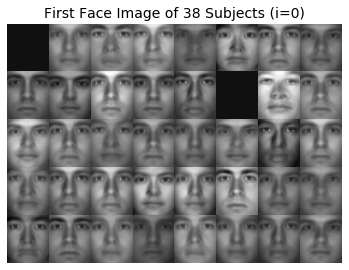

In [502]:
reduced_matrix_8_new = reduced_matrix_8 + mean_matrix
   
nr, nc = 192, 168 # height = 192, width = 168
dim = nr * nc     # dimension = 32256
nex = reduced_matrix_8_new.shape[1]  # Total number of examples = 2414

nFc = 40          # Total number of faces
nImg = np.zeros(nFc) # Numper of examples for each person
for i in range(nFc):
    if i == 13 or i ==0:
        nImg[i] = 0
    else:
        nImg[i] = 50
        
# Show the faces
# Make face board of 38 faces
faceIdx = 0 # index of face to display for each subject
Bh, Bw = 5, 8
FB = np.zeros((Bh*nr, Bw*nc))
count = 0
for i in range(nFc):
    if nImg[i] > 0:
        x = reduced_matrix_8_new[:,count*50]
        A = unpackcw(x,nr)
        row, col = divmod(i,Bw)
        rpt, cpt = row*nr, col*nc
        FB[rpt:rpt+nr, cpt:cpt+nc] = A
        count = count + 1
plt.figure(figsize = (6,6))
plt.imshow(FB, cmap='gray')
plt.axis('off')
plt.title("First Face Image of 38 Subjects (i=%i)" %faceIdx, fontsize=14)
plt.show()

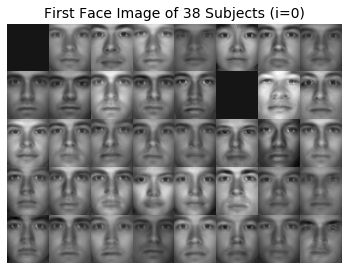

In [503]:
reduced_matrix_16_new = reduced_matrix_16 + mean_matrix
   
nr, nc = 192, 168 # height = 192, width = 168
dim = nr * nc     # dimension = 32256
nex = reduced_matrix_16_new.shape[1]  # Total number of examples = 2414

nFc = 40          # Total number of faces
nImg = np.zeros(nFc) # Numper of examples for each person
for i in range(nFc):
    if i == 13 or i ==0:
        nImg[i] = 0
    else:
        nImg[i] = 50
        
# Show the faces
# Make face board of 38 faces
faceIdx = 0 # index of face to display for each subject
Bh, Bw = 5, 8
FB = np.zeros((Bh*nr, Bw*nc))
count = 0
for i in range(nFc):
    if nImg[i] > 0:
        x = reduced_matrix_16_new[:,count*50]
        A = unpackcw(x,nr)
        row, col = divmod(i,Bw)
        rpt, cpt = row*nr, col*nc
        FB[rpt:rpt+nr, cpt:cpt+nc] = A
        count = count + 1
plt.figure(figsize = (6,6))
plt.imshow(FB, cmap='gray')
plt.axis('off')
plt.title("First Face Image of 38 Subjects (i=%i)" %faceIdx, fontsize=14)
plt.show()

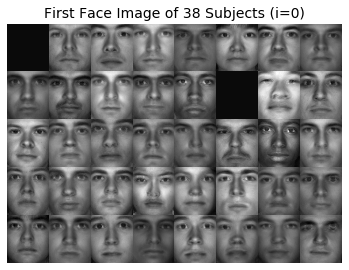

In [504]:
reduced_matrix_32_new = reduced_matrix_32 + mean_matrix
   
nr, nc = 192, 168 # height = 192, width = 168
dim = nr * nc     # dimension = 32256
nex = reduced_matrix_32_new.shape[1]  # Total number of examples = 2414

nFc = 40          # Total number of faces
nImg = np.zeros(nFc) # Numper of examples for each person
for i in range(nFc):
    if i == 13 or i ==0:
        nImg[i] = 0
    else:
        nImg[i] = 50
        
# Show the faces
# Make face board of 38 faces
faceIdx = 0 # index of face to display for each subject
Bh, Bw = 5, 8
FB = np.zeros((Bh*nr, Bw*nc))
count = 0
for i in range(nFc):
    if nImg[i] > 0:
        x = reduced_matrix_32_new[:,count*50]
        A = unpackcw(x,nr)
        row, col = divmod(i,Bw)
        rpt, cpt = row*nr, col*nc
        FB[rpt:rpt+nr, cpt:cpt+nc] = A
        count = count + 1
plt.figure(figsize = (6,6))
plt.imshow(FB, cmap='gray')
plt.axis('off')
plt.title("First Face Image of 38 Subjects (i=%i)" %faceIdx, fontsize=14)
plt.show()

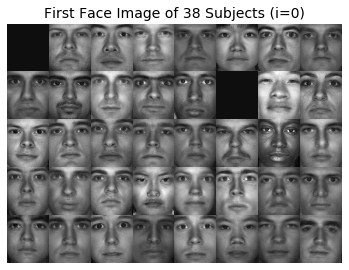

In [505]:
reduced_matrix_64_new = reduced_matrix_64 + mean_matrix
   
nr, nc = 192, 168 # height = 192, width = 168
dim = nr * nc     # dimension = 32256
nex = reduced_matrix_64_new.shape[1]  # Total number of examples = 2414

nFc = 40          # Total number of faces
nImg = np.zeros(nFc) # Numper of examples for each person
for i in range(nFc):
    if i == 13 or i ==0:
        nImg[i] = 0
    else:
        nImg[i] = 50
        
# Show the faces
# Make face board of 38 faces
faceIdx = 0 # index of face to display for each subject
Bh, Bw = 5, 8
FB = np.zeros((Bh*nr, Bw*nc))
count = 0
for i in range(nFc):
    if nImg[i] > 0:
        x = reduced_matrix_64_new[:,count*50]
        A = unpackcw(x,nr)
        row, col = divmod(i,Bw)
        rpt, cpt = row*nr, col*nc
        FB[rpt:rpt+nr, cpt:cpt+nc] = A
        count = count + 1
plt.figure(figsize = (6,6))
plt.imshow(FB, cmap='gray')
plt.axis('off')
plt.title("First Face Image of 38 Subjects (i=%i)" %faceIdx, fontsize=14)
plt.show()

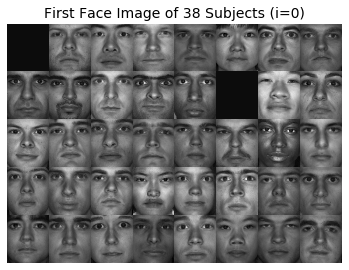

In [506]:
reduced_matrix_128_new = reduced_matrix_128 + mean_matrix
   
nr, nc = 192, 168 # height = 192, width = 168
dim = nr * nc     # dimension = 32256
nex = reduced_matrix_128_new.shape[1]  # Total number of examples = 2414

nFc = 40          # Total number of faces
nImg = np.zeros(nFc) # Numper of examples for each person
for i in range(nFc):
    if i == 13 or i ==0:
        nImg[i] = 0
    else:
        nImg[i] = 50
        
# Show the faces
# Make face board of 38 faces
faceIdx = 0 # index of face to display for each subject
Bh, Bw = 5, 8
FB = np.zeros((Bh*nr, Bw*nc))
count = 0
for i in range(nFc):
    if nImg[i] > 0:
        x = reduced_matrix_128_new[:,count*50]
        A = unpackcw(x,nr)
        row, col = divmod(i,Bw)
        rpt, cpt = row*nr, col*nc
        FB[rpt:rpt+nr, cpt:cpt+nc] = A
        count = count + 1
plt.figure(figsize = (6,6))
plt.imshow(FB, cmap='gray')
plt.axis('off')
plt.title("First Face Image of 38 Subjects (i=%i)" %faceIdx, fontsize=14)
plt.show()

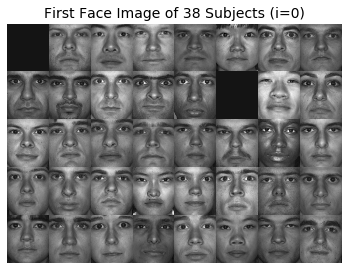

In [507]:
reduced_matrix_256_new = reduced_matrix_256 + mean_matrix
   
nr, nc = 192, 168 # height = 192, width = 168
dim = nr * nc     # dimension = 32256
nex = reduced_matrix_256_new.shape[1]  # Total number of examples = 2414

nFc = 40          # Total number of faces
nImg = np.zeros(nFc) # Numper of examples for each person
for i in range(nFc):
    if i == 13 or i ==0:
        nImg[i] = 0
    else:
        nImg[i] = 50
        
# Show the faces
# Make face board of 38 faces
faceIdx = 0 # index of face to display for each subject
Bh, Bw = 5, 8
FB = np.zeros((Bh*nr, Bw*nc))
count = 0
for i in range(nFc):
    if nImg[i] > 0:
        x = reduced_matrix_256_new[:,count*50]
        A = unpackcw(x,nr)
        row, col = divmod(i,Bw)
        rpt, cpt = row*nr, col*nc
        FB[rpt:rpt+nr, cpt:cpt+nc] = A
        count = count + 1
plt.figure(figsize = (6,6))
plt.imshow(FB, cmap='gray')
plt.axis('off')
plt.title("First Face Image of 38 Subjects (i=%i)" %faceIdx, fontsize=14)
plt.show()

### Nearest Neighbor Classifier

Use the first 50 images of each subject as a training data and rest of the images as a test data.

8) Write functions to implement nearest neighbor classifier to classify the faces on the test data and report the accuracy. 

In [511]:
#implement nearest neighbor classifier 
compare_train_vector = np.zeros((1900, 38))
#for the training data, there are 1900 vectors, calculate the norm of each vector with each vector mean 
compare_test_vector = np.zeros((514, 38))
# for the test data, there are 514 vectors, calculate the norm 

#calculate the mean vector for each object 
mean_train_matrix = np.zeros((32256,38))
for i in range(32256):
    for j in range(38):
        mean_train_matrix[i,j] = np.mean(train_set[i,50*j:50*(j+1)])
        
mean_train_matrix.shape

(32256, 38)

In [512]:
#training data and complete Euclidean norm
for i in range(1900):
    for j in range(38):
        compare_train_vector[i,j] = np.linalg.norm(train_set[:,i] - mean_train_matrix[:,j])

In [513]:
#test data dn complete Euclidean norm
for i in range(514):
    for j in range(38):
        compare_train_vector[i,j] = np.linalg.norm(test_set[:,i] - mean_train_matrix[:,j])

In [514]:
# nearest class mean by taking minimum of all norms
index_train_min = compare_train_vector.argmin(axis = 1)
index_test_min = compare_test_vector.argmin(axis = 1)

In [517]:
#count how many accuracies in the groups of 1000 samples for training data and 100 samples in testing data
frequency_count_train = 0
frequency_count_test = 0

for k in range(38):
    frequency_count_train = frequency_count_train + list(index_train_min[50*k:50*(k+1)]).count(k)
    frequency_count_test = frequency_count_test + list(index_test_min[14*k:14*(k+1)]).count(k)

#final accuracies
accuracy_train = frequency_count_train/1900
accuracy_test = frequency_count_test/514

print(accuracy_train)
print(accuracy_test)

0.2468421052631579
0.027237354085603113


9) Apply nearest neighbor classifier for the data projected on $d$ principal components for $d = 8,16,32,64,128,256$. Plot the dimension vs. accuracy graph. How does the dimension affect the accuracy of the classification?

In [518]:
# d = 8
compare_reduced_vector_8 = np.zeros((1900, 38))

#training data and complete Euclidean norm
for i in range(1900):
    for j in range(38):
        compare_reduced_vector_8[i,j] = np.linalg.norm(reduced_matrix_8_new[:,i] - mean_train_matrix[:,j])
index_reduced_min_8 = compare_reduced_vector_8.argmin(axis = 1)
frequency_count_reduced_8 = 0

for k in range(38):
    frequency_count_reduced_8 = frequency_count_reduced_8 + list(index_reduced_min_8[50*k:50*(k+1)]).count(k)
    
accuracy_reduced_8 = frequency_count_reduced_8/1900
print(accuracy_reduced_8)

0.11052631578947368


In [519]:
# d = 16
compare_reduced_vector_16 = np.zeros((1900, 38))

#training data and complete Euclidean norm
for i in range(1900):
    for j in range(38):
        compare_reduced_vector_16[i,j] = np.linalg.norm(reduced_matrix_16_new[:,i] - mean_train_matrix[:,j])
index_reduced_min_16 = compare_reduced_vector_16.argmin(axis = 1)
frequency_count_reduced_16 = 0

for k in range(38):
    frequency_count_reduced_16 = frequency_count_reduced_16 + list(index_reduced_min_16[50*k:50*(k+1)]).count(k)
    
accuracy_reduced_16 = frequency_count_reduced_16/1900
print(accuracy_reduced_16)

0.1705263157894737


In [520]:
# d = 32
compare_reduced_vector_32 = np.zeros((1900, 38))

#training data and complete Euclidean norm
for i in range(1900):
    for j in range(38):
        compare_reduced_vector_32[i,j] = np.linalg.norm(reduced_matrix_32_new[:,i] - mean_train_matrix[:,j])
index_reduced_min_32 = compare_reduced_vector_32.argmin(axis = 1)
frequency_count_reduced_32 = 0

for k in range(38):
    frequency_count_reduced_32 = frequency_count_reduced_32 + list(index_reduced_min_32[50*k:50*(k+1)]).count(k)
    
accuracy_reduced_32 = frequency_count_reduced_32/1900
print(accuracy_reduced_32)

0.23578947368421052


In [522]:
# d = 64
compare_reduced_vector_64 = np.zeros((1900, 38))

#training data and complete Euclidean norm
for i in range(1900):
    for j in range(38):
        compare_reduced_vector_64[i,j] = np.linalg.norm(reduced_matrix_64_new[:,i] - mean_train_matrix[:,j])
index_reduced_min_64 = compare_reduced_vector_64.argmin(axis = 1)
frequency_count_reduced_64 = 0

for k in range(38):
    frequency_count_reduced_64 = frequency_count_reduced_64 + list(index_reduced_min_64[50*k:50*(k+1)]).count(k)
    
accuracy_reduced_64 = frequency_count_reduced_64/1900
print(accuracy_reduced_64)

0.2984210526315789


In [526]:
# d = 128
compare_reduced_vector_128 = np.zeros((1900, 38))

#training data and complete Euclidean norm
for i in range(1900):
    for j in range(38):
        compare_reduced_vector_128[i,j] = np.linalg.norm(reduced_matrix_128_new[:,i] - mean_train_matrix[:,j])
index_reduced_min_128 = compare_reduced_vector_128.argmin(axis = 1)

frequency_count_reduced_128 = 0

for k in range(38):
    frequency_count_reduced_ = frequency_count_reduced_128 + list(index_reduced_min_128[50*k:50*(k+1)]).count(k)
    
accuracy_reduced_128 = frequency_count_reduced_128/1900
print(accuracy_reduced_128)

0.0


In [527]:
# d = 256
compare_reduced_vector_256 = np.zeros((1900, 38))

#training data and complete Euclidean norm
for i in range(1900):
    for j in range(38):
        compare_reduced_vector_256[i,j] = np.linalg.norm(reduced_matrix_256_new[:,i] - mean_train_matrix[:,j])
index_reduced_min_256 = compare_reduced_vector_256.argmin(axis = 1)
frequency_count_reduced_256 = 0

for k in range(38):
    frequency_count_reduced_ = frequency_count_reduced_256 + list(index_reduced_min_256[50*k:50*(k+1)]).count(k)
    
accuracy_reduced_256 = frequency_count_reduced_256/1900
print(accuracy_reduced_256)

0.0


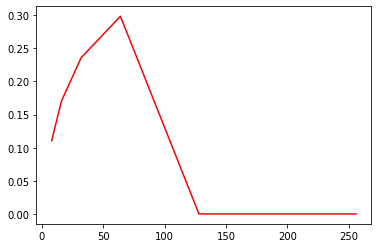

In [528]:
accuracies=[0.11052631578947368, 0.1705263157894737, 0.23578947368421052, 0.2984210526315789, 0.0, 0.0]
dimensions = [8, 16, 32, 64, 128, 256]

plt.plot(dimensions, accuracies, 'r-')

In [529]:
print("The higher dimensions should increase the accuracy.")

The higher dimensions should increase the accuracy.
